# EDA on Infant Cries Dataset

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'librosa'

## Loading dataset

In [9]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Get the parent directory by using os.path.dirname()
parent_directory = os.path.dirname(current_directory)

folder_name = "data"

# Construct the path to the desired folder using os.path.join()
desired_folder_path = os.path.join(parent_directory, folder_name)

print("Current directory (parent directory):", desired_folder_path)

os.chdir(desired_folder_path)

# Check the new current directory (parent directory)
current_directory = os.getcwd()

# List all files and directories in the specified directory
files_and_directories = os.listdir(current_directory)

# Filter out only the files from the list
files = [file for file in files_and_directories if os.path.isfile(os.path.join(current_directory, file))]

# Print the list of files
print(files)


Current directory (parent directory): d:\UMBC\606\codes\manideep_data606\data
['donateacry_corpus_cleaned_and_updated_data.zip']


In [10]:
import zipfile

zip_file_path = os.path.join(current_directory, files[0])
extracted_dir = os.path.join(parent_directory, 'temp')

if not os.path.exists(extracted_dir):
    os.makedirs(extracted_dir)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)


#!unzip donateacry_corpus_cleaned_and_updated_data.zip

## Preparing dataset for EDA

In [11]:
def list_files(folder_path):
    file_list = []

    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            file_path = os.path.join(root, file_name)
            file_list.append(file_path)

    return file_list

# Provide the path to the folder you want to list files from
#folder_path = "/content/donateacry_corpus_cleaned_and_updated_data"

# Call the function to list the files
files = list_files(extracted_dir)

# Print the file names
#for file in files:
#    print(file)

d:\UMBC\606\codes\manideep_data606\temp\donateacry_corpus_cleaned_and_updated_data\belly_pain\549a46d8-9c84-430e-ade8-97eae2bef787-1430130772174-1.7-m-48-bp.wav
d:\UMBC\606\codes\manideep_data606\temp\donateacry_corpus_cleaned_and_updated_data\belly_pain\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138495-1.0-m-72-bp.wav
d:\UMBC\606\codes\manideep_data606\temp\donateacry_corpus_cleaned_and_updated_data\belly_pain\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138506-1.0-m-72-bp.wav
d:\UMBC\606\codes\manideep_data606\temp\donateacry_corpus_cleaned_and_updated_data\belly_pain\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138514-1.0-m-72-bp.wav
d:\UMBC\606\codes\manideep_data606\temp\donateacry_corpus_cleaned_and_updated_data\belly_pain\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138524-1.0-m-72-bp.wav
d:\UMBC\606\codes\manideep_data606\temp\donateacry_corpus_cleaned_and_updated_data\belly_pain\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138536-1.0-m-72-bp.wav
d:\UMBC\606\codes\manideep_data606\temp\donateacr

### Extracting Gender, Age and reason for cry from filename and duration of the file by loading the file to librosa

In [ ]:
def get_duration(filename):
    audio_data, sample_rate = librosa.load(filename)
    audio_duration = librosa.get_duration(y=audio_data, sr=sample_rate)
    return audio_duration

df = pd.DataFrame(files, columns=['filename'])

# Splitting the string into separate columns and extracting the last three columns
df[['gender', 'age', 'label']] = df['filename'].str.split('-', expand=True).iloc[:, -3:]

df['duration'] = df['filename'].apply(get_duration)
df['label'] = df['label'].apply(lambda x: x.split('.')[0])

print(df)

                                              filename gender age label  \
0    /content/donateacry_corpus_cleaned_and_updated...      m  04    hu   
1    /content/donateacry_corpus_cleaned_and_updated...      f  26    hu   
2    /content/donateacry_corpus_cleaned_and_updated...      m  04    hu   
3    /content/donateacry_corpus_cleaned_and_updated...      m  04    hu   
4    /content/donateacry_corpus_cleaned_and_updated...      m  04    hu   
..                                                 ...    ...  ..   ...   
452  /content/donateacry_corpus_cleaned_and_updated...      f  26    bu   
453  /content/donateacry_corpus_cleaned_and_updated...      m  04    bu   
454  /content/donateacry_corpus_cleaned_and_updated...      m  26    bu   
455  /content/donateacry_corpus_cleaned_and_updated...      f  26    bu   
456  /content/donateacry_corpus_cleaned_and_updated...      m  48    bu   

     duration  
0        6.92  
1        6.90  
2        6.82  
3        7.00  
4        6.96  
.. 

## Understanding data

### checking null values and shape of the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  457 non-null    object 
 1   gender    457 non-null    object 
 2   age       457 non-null    object 
 3   label     457 non-null    object 
 4   duration  457 non-null    float64
dtypes: float64(1), object(4)
memory usage: 18.0+ KB


### Verifying extracted age column to contain only below identified values
- 04 - 0 to 4 weeks old
- 48 - 4 to 8 weeks old
- 26 - 2 to 6 months old
- 72 - 7 month to 2 years old
- 22 - more than 2 years old

In [ ]:
df.age.unique()

array(['04', '26', '48', '72', '22'], dtype=object)

### Verifying extracted gender column to contain only below identified values
- m - male
- f - female

In [ ]:
df.gender.unique()

array(['m', 'f'], dtype=object)

### Verifying extracted label column to contain only below identified values
- hu - hungry
- bu - needs burping
- bp - belly pain
- dc - discomfort
- ti - tired
- lo - lonely
- ch - cold/hot
- sc - scared
- dk - don't know

In [ ]:
df.label.unique()

array(['hu', 'ti', 'bp', 'dc', 'ch', 'bu'], dtype=object)

### Verifying duration of all the files is nearly same

In [ ]:
df.duration.unique()

array([6.92, 6.9 , 6.82, 7.  , 6.96, 6.78, 6.94, 6.74, 6.86, 6.52, 7.02,
       6.72, 6.84, 6.68, 7.06, 6.98, 6.88, 7.04, 6.64, 6.66, 6.62, 6.76,
       6.54])

### Understanding distribution of genders

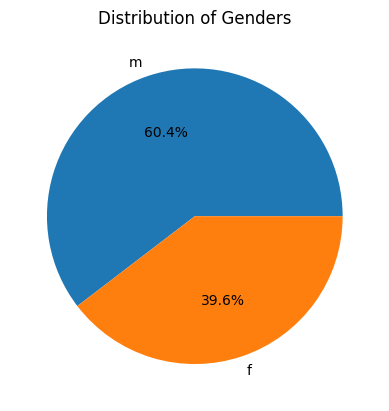

In [ ]:
# Count the occurrences of each gender
gender_counts = df['gender'].value_counts()

# Create a pie chart using Seaborn
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Genders')
plt.show()

### Understanding distribution of age

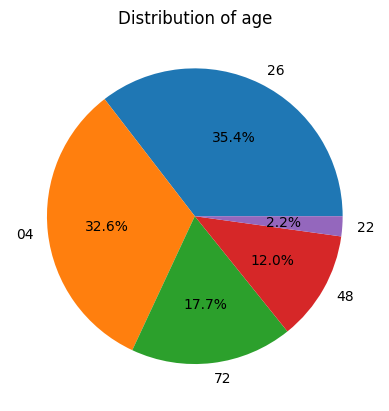

In [ ]:
# Count the occurrences of each age
gender_counts = df['age'].value_counts()

# Create a pie chart using Seaborn
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of age')
plt.show()

### Understanding distribution of label

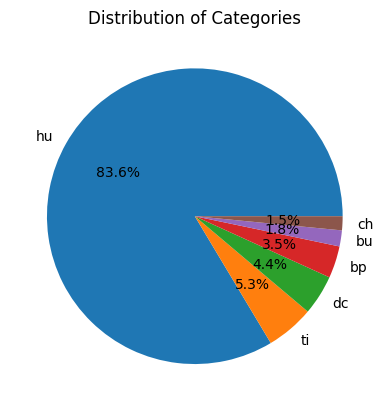

In [ ]:
# Count the occurrences of each label
gender_counts = df['label'].value_counts()

# Create a pie chart using Seaborn
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Categories')
plt.show()

### Understanding Relationship between Gender and Label

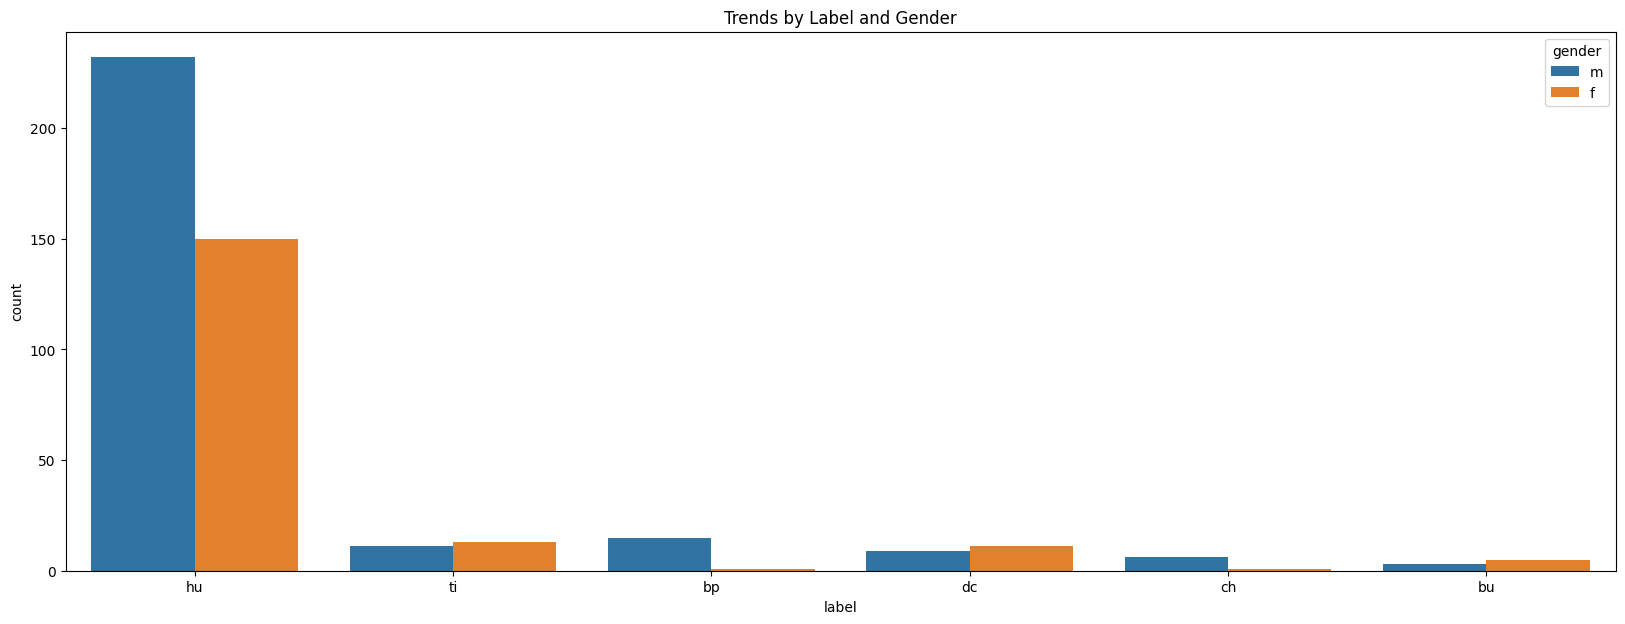

In [ ]:
f,ax=plt.subplots(1,1,figsize=(20,7))
sns.countplot(x="label", hue="gender", data=df, ax=ax)
plt.title('Trends by Label and Gender')
plt.show()

### Understanding Relationship between Age and Label

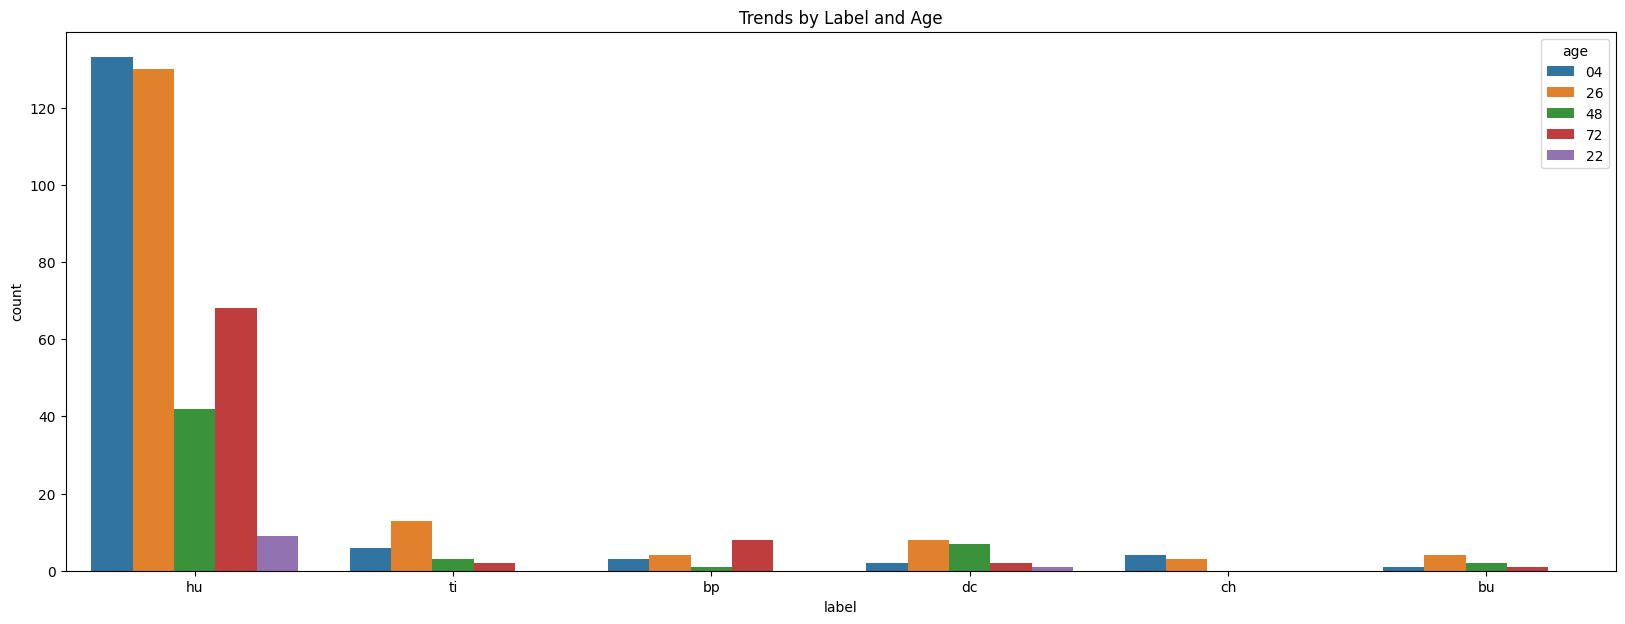

In [ ]:
f,ax=plt.subplots(1,1,figsize=(20,7))
sns.countplot(x="label", hue="age", data=df, ax=ax)
plt.title('Trends by Label and Age')
plt.show()

### 2D image representation of a baby cry

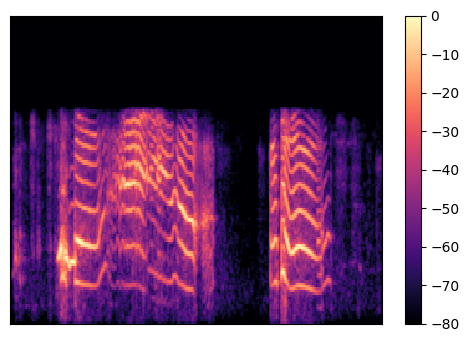

In [ ]:
fname = files[23]
samples, sample_rate = librosa.load(fname)

fig = plt.figure(figsize=[6,4])
ax = fig.add_subplot(111)
#ax.axes.get_xaxis().set_visible(False)
#ax.axes.get_yaxis().set_visible(False)
#ax.set_frame_on(False)
S = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
plt.colorbar()

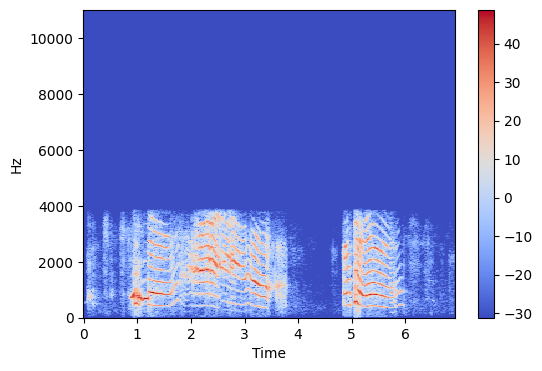

In [ ]:
x, sr = librosa.load(fname)
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize = (6, 4))
librosa.display.specshow(Xdb, sr = sr, x_axis = 'time', y_axis = 'hz')
plt.colorbar()

In [ ]:
def get_features(filename):
    audio_data, sample_rate = librosa.load(filename)
    S = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
    fill = 305 - S.shape[1]
    if fill > 0:
      S = np.concatenate((S, np.zeros((128, fill))), axis=1)
    return S#.flatten()

df['features'] = df['filename'].apply(get_features)

In [ ]:
df

,filename,gender,age,label,duration,features
0,/content/donateacry_corpus_cleaned_and_updated...,m,26,dc,6.96,"[[8.332180811976286e-08, 3.82437150392434e-07,..."
1,/content/donateacry_corpus_cleaned_and_updated...,m,04,ch,6.84,"[[1.8094854112860048e-06, 3.862859557557385e-0..."
2,/content/donateacry_corpus_cleaned_and_updated...,m,48,dc,7.00,"[[0.00039305532118305564, 0.000323946936987340..."
3,/content/donateacry_corpus_cleaned_and_updated...,f,48,dc,6.82,"[[1.998915422518621e-06, 3.423389443923952e-06..."
4,/content/donateacry_corpus_cleaned_and_updated...,f,48,dc,6.90,"[[0.00020769069669768214, 0.002036912832409143..."
...,...,...,...,...,...,...
452,/content/donateacry_corpus_cleaned_and_updated...,f,48,bu,7.00,"[[8.744928337023339e-09, 2.1631978430747267e-0..."
453,/content/donateacry_corpus_cleaned_and_updated...,m,48,bu,6.66,"[[1.1270195443557895e-08, 5.836098271316814e-0..."
454,/content/donateacry_corpus_cleaned_and_updated...,f,26,bu,7.00,"[[0.04315510764718056, 0.14976917207241058, 0...."
455,/content/donateacry_corpus_cleaned_and_updated...,f,26,bu,7.00,"[[3.2643981739965966e-07, 4.6433171974058496e-..."


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['features'], df['label'], test_size=0.2, random_state=42)

# Convert the arrays to numpy and expand dimensions for TensorFlow
X_train = np.stack(X_train.to_numpy()).astype(np.float32)
X_test = np.stack(X_test.to_numpy()).astype(np.float32)
y_train = pd.get_dummies(y_train).to_numpy()
y_test = pd.get_dummies(y_test).to_numpy()

In [ ]:
# Define the CNN model
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 305, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model2.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/10
12/12 [==============================] - 29s 2s/step - loss: 44.1212 - accuracy: 0.6575 - val_loss: 17.3446 - val_accuracy: 0.6196
Epoch 2/10
12/12 [==============================] - 26s 2s/step - loss: 2.2538 - accuracy: 0.7370 - val_loss: 4.0356 - val_accuracy: 0.7391
Epoch 3/10
12/12 [==============================] - 24s 2s/step - loss: 0.7282 - accuracy: 0.8877 - val_loss: 4.8195 - val_accuracy: 0.8043
Epoch 4/10
12/12 [==============================] - 25s 2s/step - loss: 0.5218 - accuracy: 0.8822 - val_loss: 6.8950 - val_accuracy: 0.8043
Epoch 5/10
12/12 [==============================] - 26s 2s/step - loss: 0.2930 - accuracy: 0.9068 - val_loss: 4.6927 - val_accuracy: 0.7935
Epoch 6/10
12/12 [==============================] - 25s 2s/step - loss: 0.2367 - accuracy: 0.9342 - val_loss: 7.0459 - val_accuracy: 0.8043
Epoch 7/10
12/12 [==============================] - 26s 2s/step - loss: 0.1696 - accuracy: 0.9452 - val_loss: 9.0687 - val_accuracy: 0.8043
Epoch 8/10
12/12 [

In [ ]:
# Define the CNN model
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 305, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model1.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/10
12/12 [==============================] - 16s 1s/step - loss: 52.7775 - accuracy: 0.6932 - val_loss: 25.7280 - val_accuracy: 0.5652
Epoch 2/10
12/12 [==============================] - 14s 1s/step - loss: 5.5356 - accuracy: 0.7589 - val_loss: 32.9328 - val_accuracy: 0.7500
Epoch 3/10
12/12 [==============================] - 14s 1s/step - loss: 1.9708 - accuracy: 0.9178 - val_loss: 37.3619 - val_accuracy: 0.7826
Epoch 4/10
12/12 [==============================] - 15s 1s/step - loss: 0.3747 - accuracy: 0.9288 - val_loss: 39.9630 - val_accuracy: 0.7935
Epoch 5/10
12/12 [==============================] - 15s 1s/step - loss: 0.1655 - accuracy: 0.9452 - val_loss: 39.8883 - val_accuracy: 0.7935
Epoch 6/10
12/12 [==============================] - 14s 1s/step - loss: 0.0866 - accuracy: 0.9589 - val_loss: 39.8467 - val_accuracy: 0.7935
Epoch 7/10
12/12 [==============================] - 15s 1s/step - loss: 0.0657 - accuracy: 0.9699 - val_loss: 39.7698 - val_accuracy: 0.7935
Epoch 8/10
1

In [ ]:
# Define the CNN model with Dropout regularization
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 305, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),  # Added
    Dropout regularization
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),  # Added Dropout regularization
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Compile the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model3.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model3.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/10
12/12 [==============================] - 29s 2s/step - loss: 75.4910 - accuracy: 0.6466 - val_loss: 31.4612 - val_accuracy: 0.7826
Epoch 2/10
12/12 [==============================] - 27s 2s/step - loss: 2.7104 - accuracy: 0.8575 - val_loss: 9.8170 - val_accuracy: 0.8043
Epoch 3/10
12/12 [==============================] - 26s 2s/step - loss: 0.8107 - accuracy: 0.8740 - val_loss: 5.9867 - val_accuracy: 0.7935
Epoch 4/10
12/12 [==============================] - 25s 2s/step - loss: 0.5517 - accuracy: 0.8959 - val_loss: 4.9632 - val_accuracy: 0.8043
Epoch 5/10
12/12 [==============================] - 26s 2s/step - loss: 0.4403 - accuracy: 0.9123 - val_loss: 4.7167 - val_accuracy: 0.8043
Epoch 6/10
12/12 [==============================] - 26s 2s/step - loss: 0.3999 - accuracy: 0.9178 - val_loss: 4.8005 - val_accuracy: 0.8152
Epoch 7/10
12/12 [==============================] - 26s 2s/step - loss: 0.3459 - accuracy: 0.9260 - val_loss: 5.0304 - val_accuracy: 0.8152
Epoch 8/10
12/12 [

In [ ]:
from sklearn.metrics import classification_report

# Evaluate the model on test data
y_pred = model3.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Create the classification report
report = classification_report(y_true, y_pred, zero_division=1)
print(report)

3/3 [==============================] - 1s 439ms/step
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       1.00      0.50      0.67         2
           2       1.00      0.00      0.00         1
           3       1.00      0.00      0.00         7
           4       0.81      1.00      0.90        74
           5       1.00      0.00      0.00         6

    accuracy                           0.82        92
   macro avg       0.97      0.25      0.26        92
weighted avg       0.85      0.82      0.74        92



In [ ]:
df['label'].value_counts()

hu    382
ti     24
dc     20
bp     16
bu      8
ch      7
Name: label, dtype: int64

In [ ]:
# Define the CNN model with Dropout regularization
model4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 305, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),  # Added Dropout regularization
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),  # Added Dropout regularization
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Define the learning rate scheduler
lr_scheduler = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=1000,
    decay_rate=0.5
)

# Compile the model with the learning rate scheduler
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_scheduler),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model4.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model4.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/10
12/12 [==============================] - 17s 1s/step - loss: 59.3163 - accuracy: 0.6658 - val_loss: 1.5176 - val_accuracy: 0.7826
Epoch 2/10
12/12 [==============================] - 15s 1s/step - loss: 1.5025 - accuracy: 0.8055 - val_loss: 1.2919 - val_accuracy: 0.7717
Epoch 3/10
12/12 [==============================] - 15s 1s/step - loss: 1.1505 - accuracy: 0.8466 - val_loss: 1.1689 - val_accuracy: 0.8043
Epoch 4/10
12/12 [==============================] - 22s 2s/step - loss: 1.0218 - accuracy: 0.8438 - val_loss: 0.9436 - val_accuracy: 0.8043
Epoch 5/10
12/12 [==============================] - 18s 1s/step - loss: 0.8125 - accuracy: 0.8438 - val_loss: 0.8240 - val_accuracy: 0.8043
Epoch 6/10
12/12 [==============================] - 17s 1s/step - loss: 0.7170 - accuracy: 0.8438 - val_loss: 0.7961 - val_accuracy: 0.8043
Epoch 7/10
12/12 [==============================] - 17s 1s/step - loss: 0.6883 - accuracy: 0.8438 - val_loss: 0.7944 - val_accuracy: 0.8043
Epoch 8/10
12/12 [=

In [ ]:
# Define the CNN model with Dropout regularization
model5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 305, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),  # Added Dropout regularization
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),  # Added Dropout regularization
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Define the learning rate schedule
initial_learning_rate = 0.001
decay_steps = 1000
decay_rate = 0.5

def learning_rate_scheduler(epoch):
    return initial_learning_rate * decay_rate**(epoch // decay_steps)

# Compile the model
model5.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define the learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(learning_rate_scheduler)

# Train the model
model5.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_scheduler])


# Evaluate the model
loss, accuracy = model5.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/20
12/12 [==============================] - 18s 1s/step - loss: 43.4624 - accuracy: 0.7370 - val_loss: 5.6623 - val_accuracy: 0.5217 - lr: 0.0010
Epoch 2/20
12/12 [==============================] - 16s 1s/step - loss: 1.7251 - accuracy: 0.6959 - val_loss: 2.0738 - val_accuracy: 0.7065 - lr: 0.0010
Epoch 3/20
12/12 [==============================] - 16s 1s/step - loss: 0.6444 - accuracy: 0.8740 - val_loss: 1.9144 - val_accuracy: 0.8043 - lr: 0.0010
Epoch 4/20
12/12 [==============================] - 17s 1s/step - loss: 0.5565 - accuracy: 0.8959 - val_loss: 1.9075 - val_accuracy: 0.8043 - lr: 0.0010
Epoch 5/20
12/12 [==============================] - 17s 1s/step - loss: 0.4924 - accuracy: 0.9123 - val_loss: 2.0301 - val_accuracy: 0.8043 - lr: 0.0010
Epoch 6/20
12/12 [==============================] - 17s 1s/step - loss: 0.4480 - accuracy: 0.9151 - val_loss: 2.1942 - val_accuracy: 0.8043 - lr: 0.0010
Epoch 7/20
12/12 [==============================] - 16s 1s/step - loss: 0.4042 - 

In [ ]:
!pip install SpeechRecognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 33.4 MB/s eta 0:00:00


In [ ]:
import speech_recognition as sr
recognizer = sr.Recognizer()


In [ ]:
audio_file = fname
with sr.AudioFile(audio_file) as source:
    audio = recognizer.record(source)

In [ ]:
text = recognizer.recognize_google(audio)
print(text)

UnknownValueError: ignored